In [1]:
import os
import pandas as pd
from sklearn.linear_model import Lasso


In [3]:
os.chdir('U:\ProjectDataset')

In [4]:
dt=pd.read_excel('PCA_LUAD_L.xlsx')

In [5]:
dt=dt.set_index(dt.columns[0])

In [8]:
tar=pd.read_excel('survival_LUAD.xlsx')

In [10]:
Y=tar

In [12]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(dt,Y,test_size=0.3,random_state=47)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)train_test

(361, 16) (156, 16)
(361, 1) (156, 1)


In [123]:
lassoReg=Lasso(alpha=0.001,normalize=True)
lassoReg.fit(X_train,Y_train)
predictions=lassoReg.predict(X_train)

In [124]:
print(lassoReg.score(X_train,Y_train))  

0.8506050347892483


In [125]:
print(lassoReg.score(X_test,Y_test))

0.7715637204792901


In [126]:
from sklearn.metrics import mean_squared_error


In [127]:
print(mean_squared_error(Y_train,predictions))

143.84755045350425


In [128]:
predictors=X_train.columns

In [129]:
from pandas import Series
coef=Series(lassoReg.coef_,predictors).sort_values()

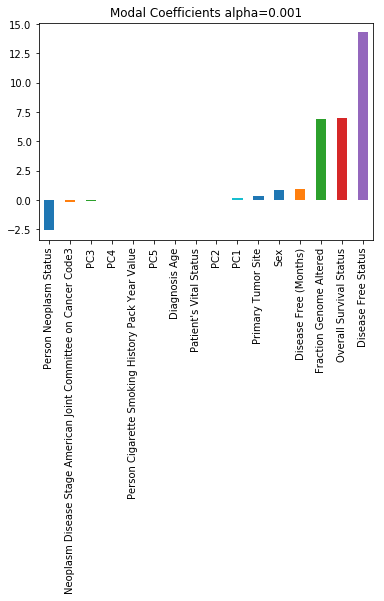

In [130]:
#plt.title('Variable Coefficients alpha = 0.01')
#plt.ylabel('coefficients')
coef.plot(kind='bar',title='Modal Coefficients alpha=0.001')
from matplotlib import pyplot as plt
plt.savefig('Lasso.pdf')

In [81]:
os.chdir('U:\ProjectDataset\Lasso_LUAD')